# Retail Data Analytics

In this analysis, tasks to be performed;

- Predict the department-wide sales for each store for the following year
- Model the effects of markdowns on holiday weeks
- Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

Importing the necessary libraries. 

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split


Loading in the data for exploring and understanding 

In [2]:
filenames =  ['Features data set', 'sales data-set', 'stores data-set']

for i in filenames:
    if i == 'stores data-set':
         stores = pd.read_csv(i + '.csv')
    elif i == 'sales data-set':
         sales = pd.read_csv(i + '.csv')
    else:
         features = pd.read_csv(i + '.csv')

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Understanding the data

### Store Analysis

checking for null values

In [6]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [7]:
avg_store_size = stores.groupby(['Type'])['Size'].mean().round().reset_index()
avg_store_size

,Type,Size
0,A,177248.0
1,B,101191.0
2,C,40542.0


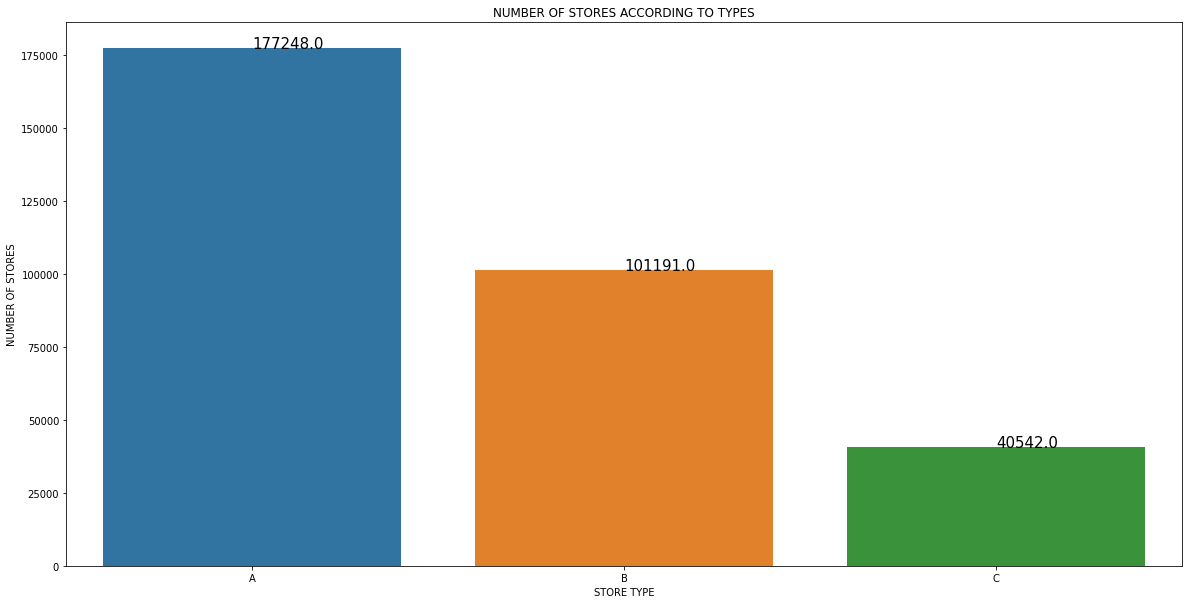

In [8]:
fig = plt.subplots( figsize = (20,10))

#plotting the type vs the average size of the store
sns.barplot(x = 'Type', y ='Size', data = avg_store_size)
plt.title('NUMBER OF STORES ACCORDING TO TYPES')
plt.xlabel('STORE TYPE')
plt.ylabel('NUMBER OF STORES')

for index,data in enumerate(avg_store_size['Size']):
    plt.text(x=index , y = data , s = data , fontdict=dict(fontsize=15))
    

Store type A has an average size of 177248, store type B, an average size of 101191 snd type C, average size of 40542. It is seen that store type C is the smallest size store as compared to the other two. 

In [9]:
store_type = stores.groupby(['Type'])['Store'].count().reset_index()
store_type

,Type,Store
0,A,22
1,B,17
2,C,6


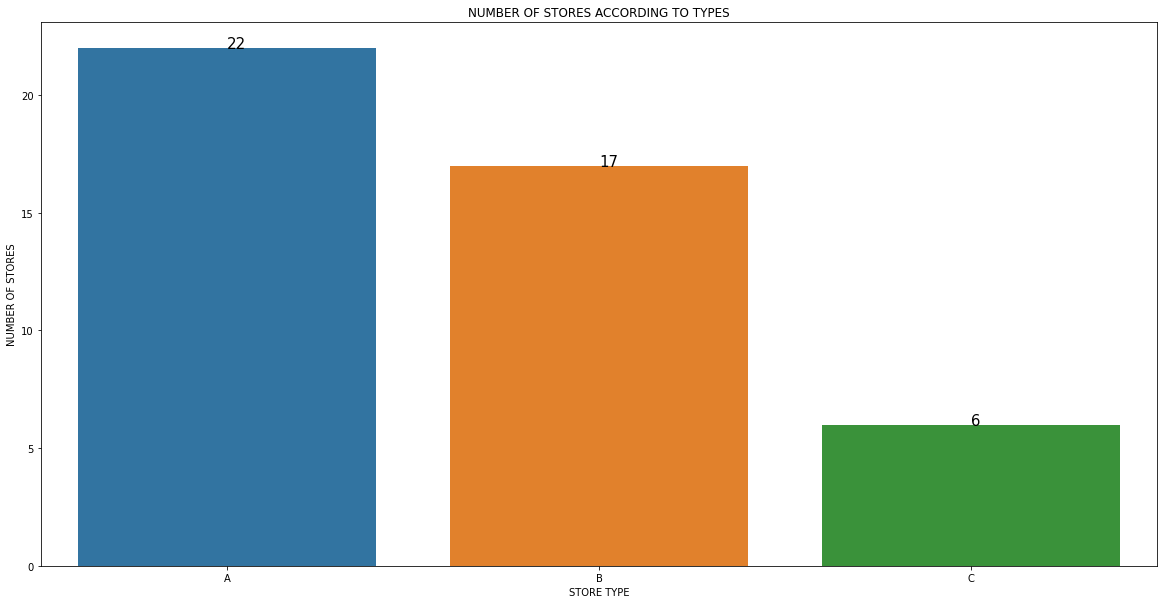

In [10]:
fig = plt.subplots( figsize = (20,10))

#plotting the type vs the number of stores
sns.barplot(x = 'Type', y ='Store', data = store_type)
plt.title('NUMBER OF STORES ACCORDING TO TYPES')
plt.xlabel('STORE TYPE')
plt.ylabel('NUMBER OF STORES') 
#getting the size labels on the plot 

for index,data in enumerate(store_type['Store']):
    plt.text(x=index , y = data , s = data , fontdict=dict(fontsize=15))

Store type A has the highest stores across the different regions as compared to store types B and C and also has seen store type A also has the highest average store size.

### Understanding the stores with the features and sales 

This can lead to asking relevant questions as which store has the highest sales

In [11]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [12]:
sales.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [13]:
data_Store = features.groupby(['Store','IsHoliday']).agg({"Temperature":"mean","Fuel_Price":"mean"}).reset_index()
data_Store.head()

,Store,IsHoliday,Temperature,Fuel_Price
0,1,False,67.698757,3.269722
1,1,True,56.684615,3.123000
2,2,False,67.540178,3.269722
3,2,True,56.175385,3.123000
4,3,False,71.045089,3.269722


In [14]:
sales_store = sales.groupby("Store")['Weekly_Sales'].sum().reset_index()
sales_store.head()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07


Getting sales by 1,000,000

In [15]:
sales_store.Weekly_Sales = (sales_store.Weekly_Sales /1000000).round()
sales_store = sales_store.rename(columns = {'Weekly_Sales': 'Weekly_Sales(in M)'}) 

sales_store.head()

,Store,Weekly_Sales(in M)
0,1,222.0
1,2,275.0
2,3,58.0
3,4,300.0
4,5,45.0


In [16]:
print('length of store data is ', len(stores), ', ', 
     'length of feature data is ', len(data_Store), 'and ', 'length of sales data is ', len(sales_store))

length of store data is  45 ,  length of feature data is  90 and  length of sales data is  45


Since the datasets are in order we can proceed to add the features and sales datasets to that of the store

In [17]:
store_data = stores.copy()
store_data['Weekly_Sales(in M)'] = sales_store['Weekly_Sales(in M)']
store_data.head()

,Store,Type,Size,Weekly_Sales(in M)
0,1,A,151315,222.0
1,2,A,202307,275.0
2,3,B,37392,58.0
3,4,A,205863,300.0
4,5,B,34875,45.0


### Store Analysis According to Type 

In [18]:
store_type_weekly = store_data.groupby('Type')['Weekly_Sales(in M)'].mean().round(2).reset_index()
store_type_weekly

,Type,Weekly_Sales(in M)
0,A,196.82
1,B,117.71
2,C,67.67


Plotting the boxplot of the weekly sales to see the distribution. 

Text(0.5, 1.0, 'DISTRBUTION OF THE WEEKLY SALES')

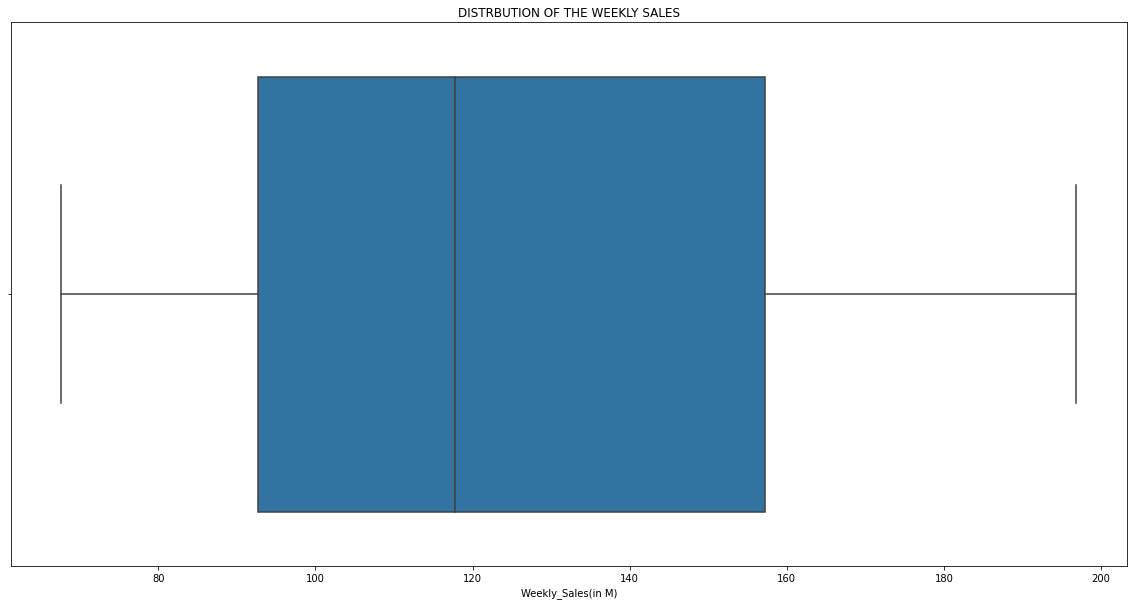

In [19]:
fig = plt.subplots( figsize = (20,10))

sns.boxplot(x = 'Weekly_Sales(in M)', data = store_type_weekly)
plt.title('DISTRBUTION OF THE WEEKLY SALES')

In [20]:
store_type_weekly.describe()

,Weekly_Sales(in M)
count,3.000000
mean,127.400000
std,65.117991
min,67.670000
25%,92.690000
50%,117.710000
75%,157.265000
max,196.820000


AS seen from the above, the highest values of weekly sales is about 200 million, the least is about 70 million and a mean of about 120 million.

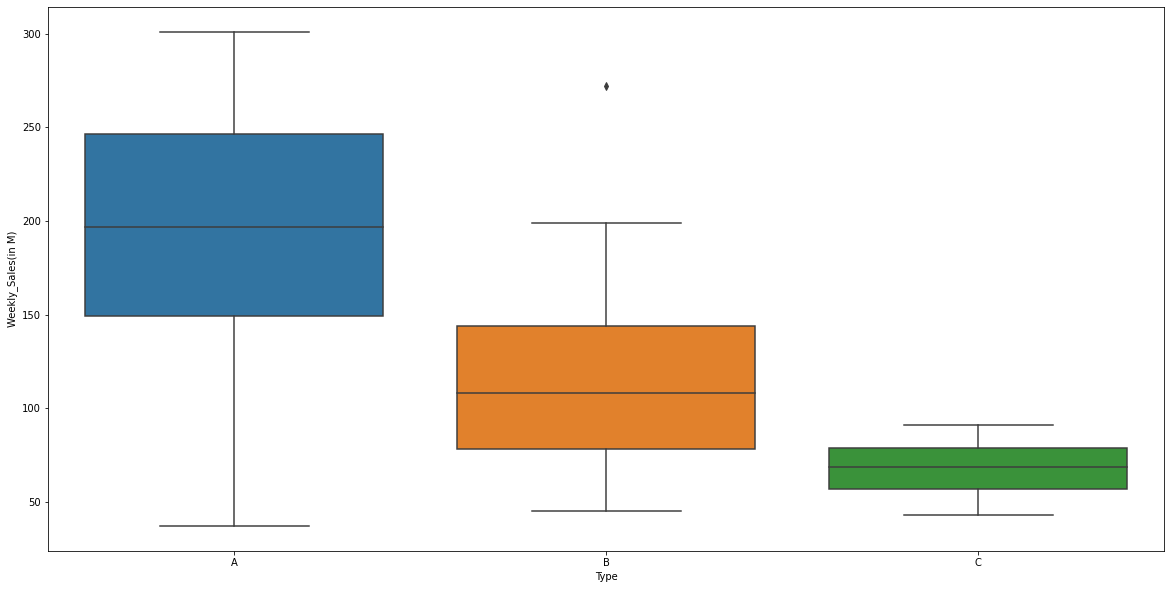

In [21]:
fig = plt.subplots( figsize = (20,10))

sns.boxplot(x = 'Type', y ='Weekly_Sales(in M)', data = store_data)

In [22]:
store_data.groupby('Type').describe()

Store                                                        Size  \
     count       mean        std   min    25%   50%    75%   max count   
Type                                                                     
A     22.0  22.227273  13.078269   1.0  11.50  25.0  32.75  41.0  22.0   
B     17.0  18.352941  11.028039   3.0  10.00  17.0  23.00  45.0  17.0   
C      6.0  39.000000   5.215362  30.0  37.25  40.0  42.75  44.0   6.0   

                     ...                     Weekly_Sales(in M)              \
               mean  ...       75%       max              count        mean   
Type                 ...                                                      
A     177247.727273  ...  203819.0  219622.0               22.0  196.818182   
B     101190.705882  ...  123737.0  140167.0               17.0  117.705882   
C      40541.666667  ...   40774.0   42988.0                6.0   67.666667   

                                                   
            std   min    25%    50%    75%    max  
Type                                               
A     72.645674  37.0  149.0  197.0  246.5  301.0  
B     55.994157  45.0   78.0  108.0  144.0  272.0  
C     17.477605  43.0   57.0   68.5   78.5   91.0  

[3 rows x 24 columns]

- Store type A has a least weekly sale of about 40 million to a maximum of about 300 million.
- Store type B has a least weekly sales of about 45 million and a max of about 280 million. 
- Store type C has a least weekly sales of about 43 million and a max of about 91 million.

In [23]:
ss = sales.copy()
ss1 = sales.groupby(["Store", 'Date'])['Weekly_Sales'].sum().reset_index()
ss1.Date = pd.to_datetime(ss1.Date)
ss1['Year'] = ss1.Date.dt.year
ss1['Type'] = store_data['Type']
ss_year = ss1.groupby(['Type','Year'])['Weekly_Sales'].sum().reset_index()


,Store,Date,Weekly_Sales,Year,Type
0,1,2011-01-04,1495064.75,2011,A
1,1,2012-01-06,1624477.58,2012,A
2,1,2011-01-07,1488538.09,2011,B
3,1,2010-01-10,1453329.50,2010,A
4,1,2012-02-03,1688420.76,2012,B
...,...,...,...,...,...
6430,45,2010-07-30,716859.27,2010,NaN
6431,45,2011-09-30,698986.34,2011,NaN
6432,45,2011-12-30,869403.63,2011,NaN
6433,45,2012-08-31,734297.87,2012,NaN


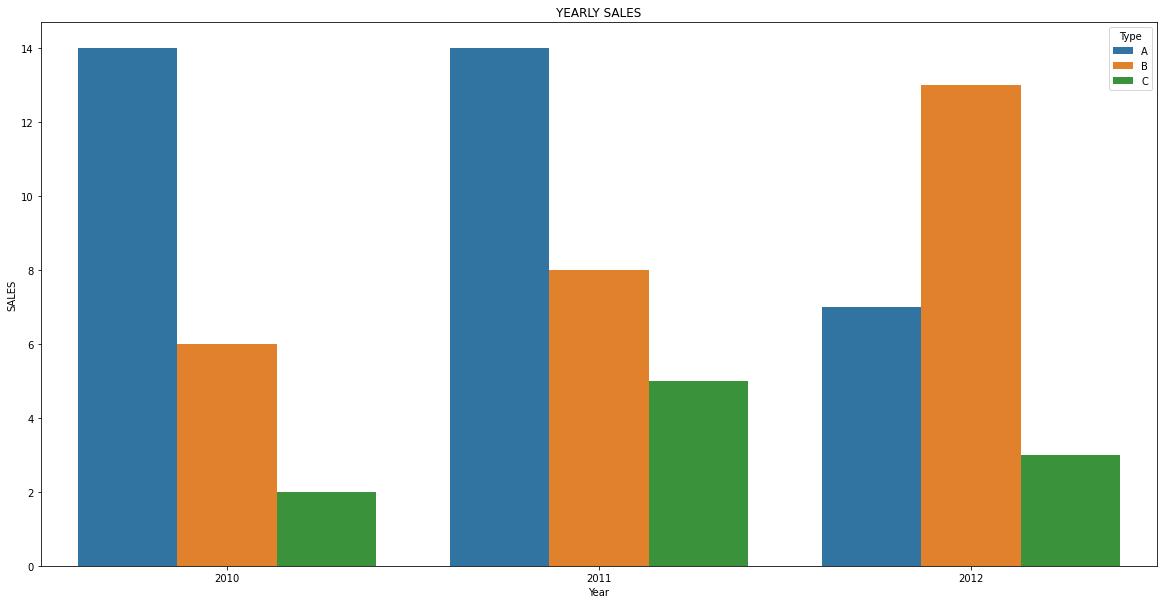

In [24]:
ss_year.Weekly_Sales = (ss_year.Weekly_Sales /1000000).round()
plt.subplots(figsize = (20,10))
sns.barplot(x ='Year', y ='Weekly_Sales', data = ss_year, hue = 'Type')
plt.title('YEARLY SALES')
plt.ylabel('SALES')
ss1

In [25]:
store_weekly = store_data.groupby('Store')['Weekly_Sales(in M)'].mean().round(2).reset_index()
store_weekly.head()

,Store,Weekly_Sales(in M)
0,1,222.0
1,2,275.0
2,3,58.0
3,4,300.0
4,5,45.0


Text(0.5, 1.0, 'MEAN WEEKLY SALES ACCORDING TO STORES')

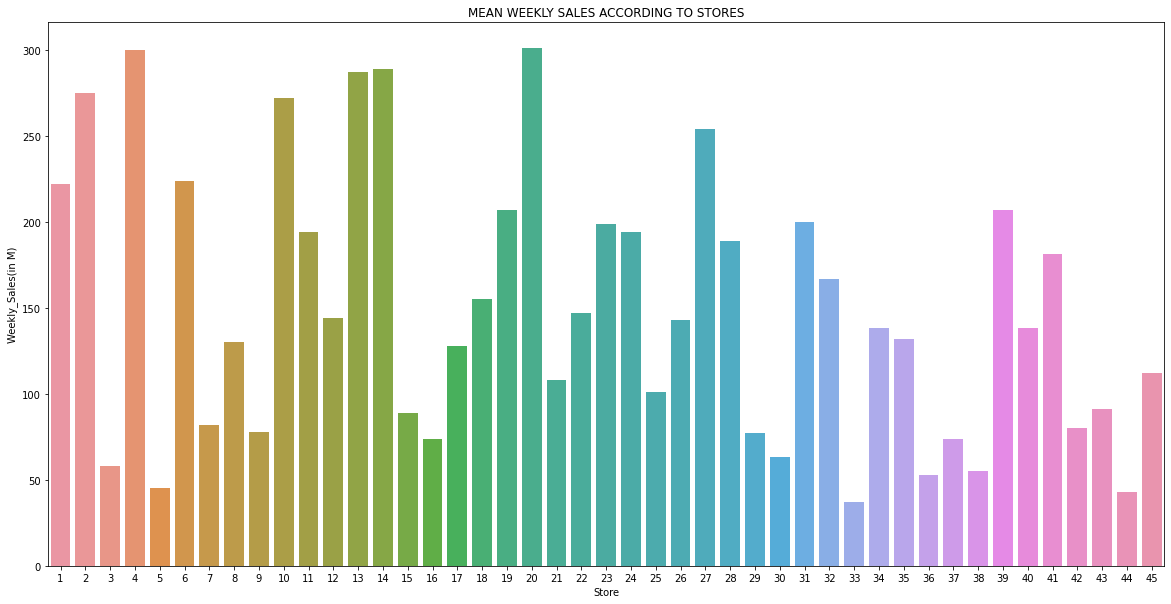

In [26]:
fig = plt.subplots( figsize = (20,10))

ss = store_weekly.groupby('Store')['Weekly_Sales(in M)'].mean().reset_index()
sns.barplot(x = 'Store', y = 'Weekly_Sales(in M)', data = ss)
plt.title('MEAN WEEKLY SALES ACCORDING TO STORES')

## Time Series Analysis 

In [27]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [28]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [29]:
sales_data = sales.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].sum().reset_index()
sales_data.head()

,Date,IsHoliday,Weekly_Sales
0,01/04/2011,False,43458991.19
1,01/06/2012,False,48281649.72
2,01/07/2011,False,47578519.50
3,01/10/2010,False,42239875.87
4,02/03/2012,False,46861034.97


Convert weekly sales into millions

In [30]:
sales_data.Weekly_Sales = (sales_data.Weekly_Sales /1000000).round()
sales_data = sales_data.rename(columns = {'Weekly_Sales': 'Weekly_Sales(in M)'}) 

sales_store.head()

,Store,Weekly_Sales(in M)
0,1,222.0
1,2,275.0
2,3,58.0
3,4,300.0
4,5,45.0


In [31]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                143 non-null    object 
 1   IsHoliday           143 non-null    bool   
 2   Weekly_Sales(in M)  143 non-null    float64
dtypes: bool(1), float64(1), object(1)
memory usage: 2.5+ KB


In [32]:
sales_data.Date = pd.to_datetime(sales_data.Date)
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                143 non-null    datetime64[ns]
 1   IsHoliday           143 non-null    bool          
 2   Weekly_Sales(in M)  143 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1)
memory usage: 2.5 KB


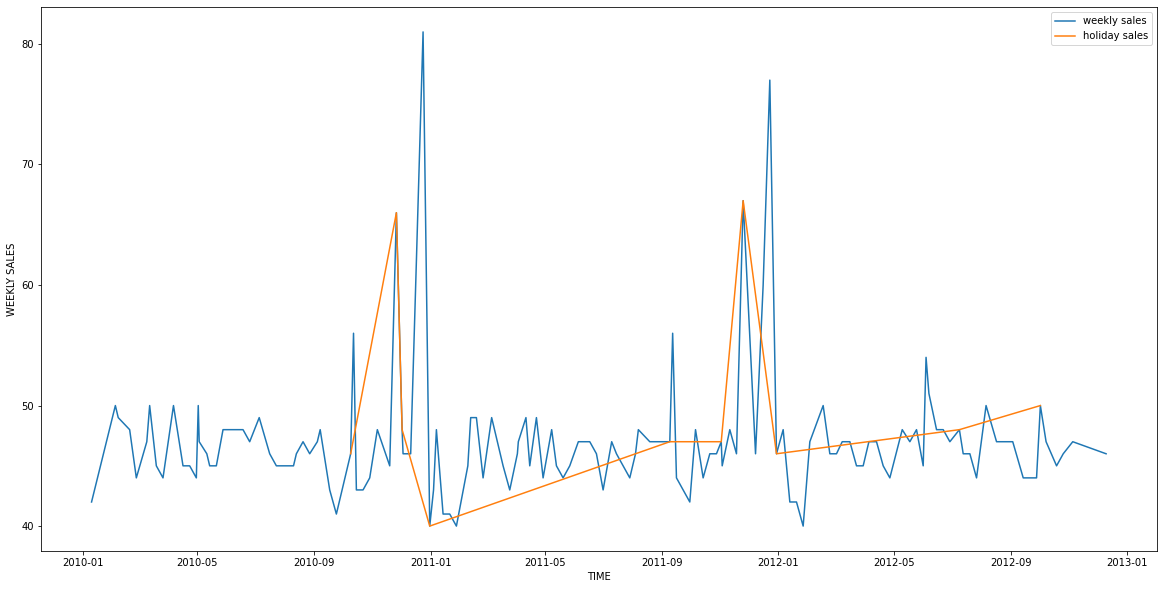

In [33]:
fig, ax = plt.subplots(figsize = (20,10))
sales_data = sales_data.sort_values(by = 'Date')
plt.plot(sales_data.Date ,sales_data['Weekly_Sales(in M)'], label = 'weekly sales')
plt.xlabel('TIME')
plt.ylabel('WEEKLY SALES')


holiday_sales_data = sales_data[sales_data.IsHoliday==True]

plt.plot(holiday_sales_data.Date ,holiday_sales_data['Weekly_Sales(in M)'], label = 'holiday sales')

plt.legend(loc = 'best')

#not_holiday_sales_data = sales_data[sales_data.IsHoliday==False]
#plt.plot(not_holiday_sales_data.Date ,not_holiday_sales_data['Weekly_Sales(in M)'])


## Monthly sales

In [34]:
sales.Date = pd.to_datetime(sales.Date)
sales['Month'] = sales.Date.dt.month

In [35]:
sales_monthly = sales.groupby('Month')['Weekly_Sales'].sum().reset_index()
sales_monthly.Weekly_Sales = (sales_monthly.Weekly_Sales /1000000).round()
sales_monthly

,Month,Weekly_Sales
0,1,426.0
1,2,522.0
2,3,553.0
3,4,645.0
4,5,606.0
5,6,575.0
6,7,593.0
7,8,564.0
8,9,591.0
9,10,603.0


Text(0, 0.5, 'SALES')

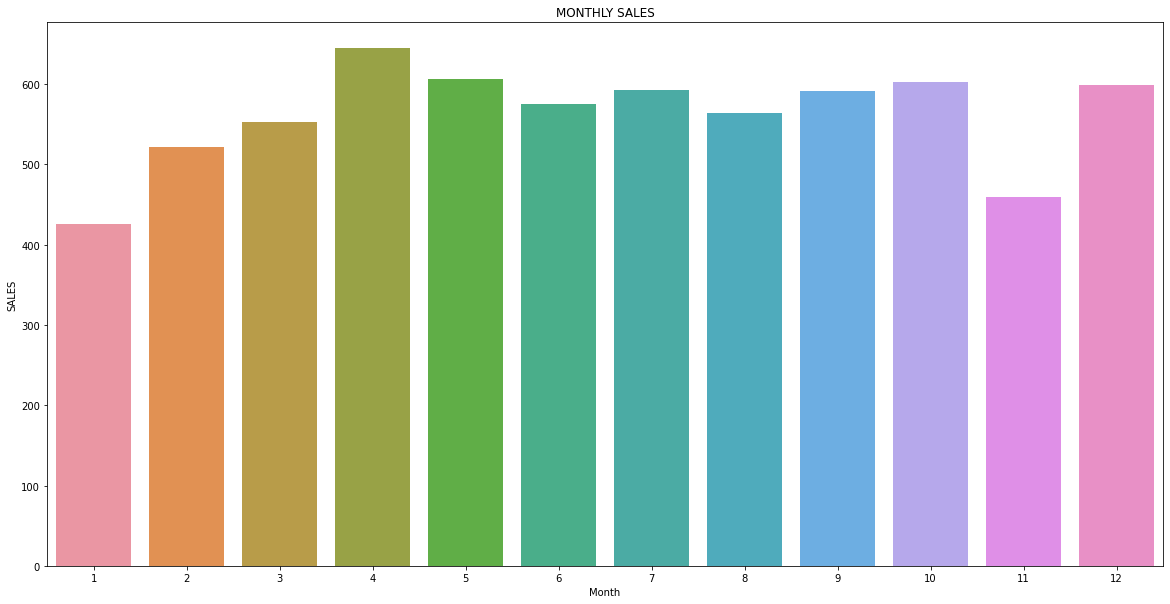

In [36]:
plt.subplots(figsize = (20,10))
sns.barplot(x ='Month', y ='Weekly_Sales', data = sales_monthly)
plt.title('MONTHLY SALES')
plt.ylabel('SALES')

April recorded the highest sales with a slight difference from the other months.

## Yearly Sales

In [37]:
sales.Date = pd.to_datetime(sales.Date)
sales['Year'] = sales.Date.dt.year
sales_year = sales.groupby('Year')['Weekly_Sales'].sum().reset_index()
sales_year.Weekly_Sales = (sales_year.Weekly_Sales /1000000).round()
sales_year

,Year,Weekly_Sales
0,2010,2289.0
1,2011,2448.0
2,2012,2000.0


Text(0, 0.5, 'SALES')

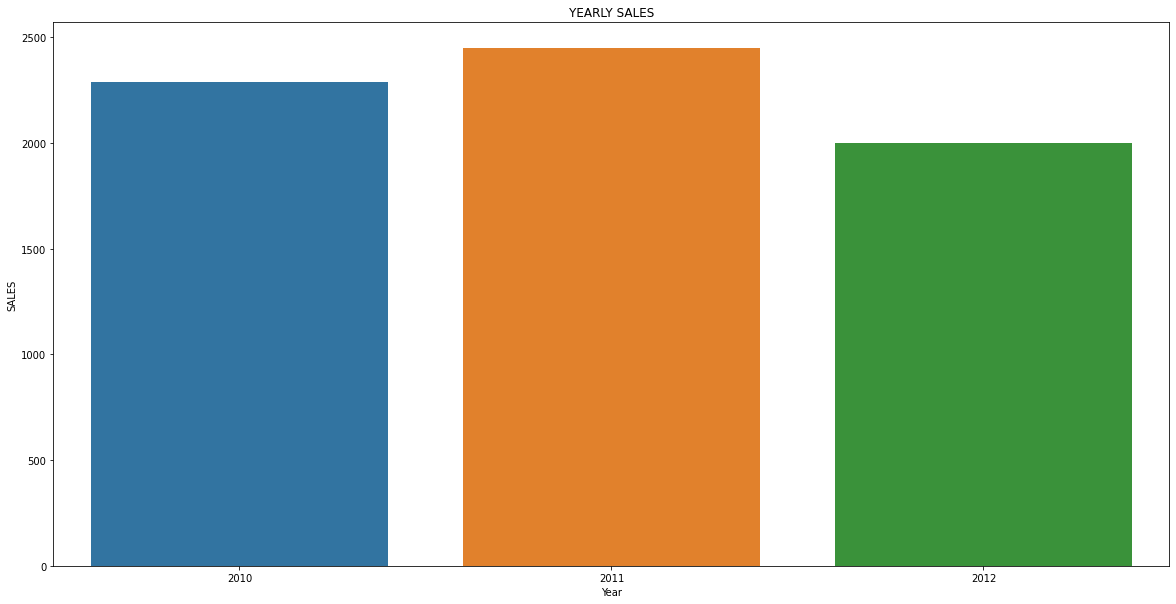

In [38]:
plt.subplots(figsize = (20,10))
sns.barplot(x ='Year', y ='Weekly_Sales', data = sales_year)
plt.title('YEARLY SALES')
plt.ylabel('SALES')

2011 recorded the highest sales with slight difference comparing to the other years.

### Features

In [39]:
data_features = features.groupby(['Date', 'IsHoliday']).agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"}).reset_index()
data_features.Date = pd.to_datetime(data_features.Date)

data_features = data_features.sort_values(by = 'Date')
data_features

,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
5,2010-01-10,False,69.868000,2.734333,168.354706,8.475289
7,2010-02-04,False,53.120889,2.827333,167.789036,8.497711
8,2010-02-07,False,77.133333,2.793511,167.982101,8.428578
108,2010-02-19,False,37.719778,2.672067,167.871686,8.619311
150,2010-02-26,False,39.243556,2.683933,167.909657,8.619311
...,...,...,...,...,...,...
43,2013-08-03,False,44.889111,3.775711,177.672434,6.876444
55,2013-10-05,False,62.092444,3.542822,NaN,NaN
60,2013-11-01,False,38.091556,3.377489,177.235667,6.876444
68,2013-12-04,False,55.050222,3.671044,177.990680,6.719244


In [40]:
data = pd.merge(sales_data, data_features, how='left', on = ['Date', 'IsHoliday'])

In [41]:
data.describe()

,Weekly_Sales(in M),Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,143.000000,143.000000,143.000000,143.000000
mean,47.118881,60.663782,3.358607,171.578394,7.999151
std,5.472710,15.172792,0.429401,3.100148,0.483853
min,40.000000,30.480889,2.672067,167.546485,6.953711
25%,45.000000,47.720222,2.885367,168.408144,7.508333
50%,46.000000,61.051111,3.488644,171.386189,8.150133
75%,48.000000,74.697333,3.726133,174.724576,8.428578
max,81.000000,82.176444,3.997778,176.652613,8.619311


In [42]:
data.head()

,Date,IsHoliday,Weekly_Sales(in M),Temperature,Fuel_Price,CPI,Unemployment
0,2010-01-10,False,42.0,69.868000,2.734333,168.354706,8.475289
1,2010-02-04,False,50.0,53.120889,2.827333,167.789036,8.497711
2,2010-02-07,False,49.0,77.133333,2.793511,167.982101,8.428578
3,2010-02-19,False,48.0,37.719778,2.672067,167.871686,8.619311
4,2010-02-26,False,44.0,39.243556,2.683933,167.909657,8.619311


In [43]:
data.isnull().sum()

Date                  0
IsHoliday             0
Weekly_Sales(in M)    0
Temperature           0
Fuel_Price            0
CPI                   0
Unemployment          0
dtype: int64

Text(0.5, 1.0, 'TEMPERATURE')

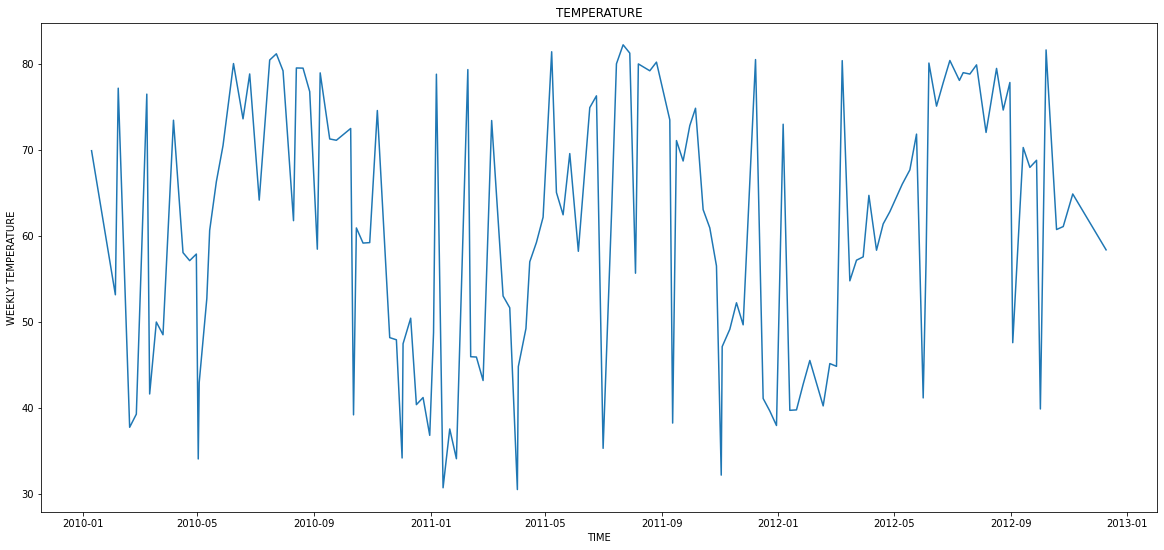

In [44]:
fig, ax = plt.subplots(figsize = (20,9))

plt.plot(data.Date ,data['Temperature'])
plt.xlabel('TIME')
plt.ylabel('WEEKLY TEMPERATURE')
plt.title('TEMPERATURE')

Text(0.5, 1.0, 'FUEL PRICES')

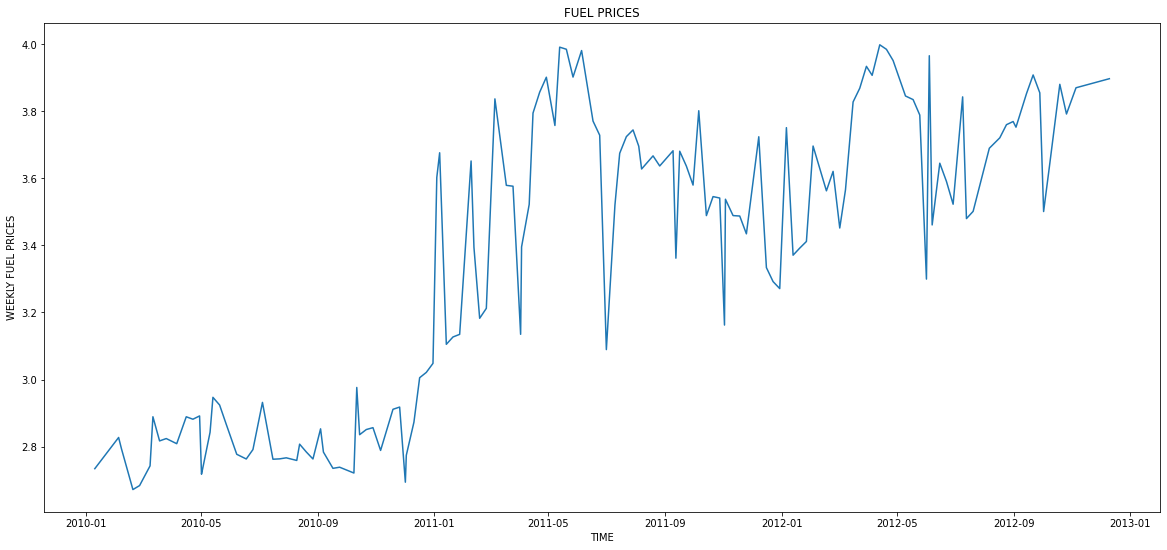

In [45]:
plt.subplots(figsize = (20,9))

plt.plot(data.Date ,data['Fuel_Price'])
plt.xlabel('TIME')
plt.ylabel('WEEKLY FUEL PRICES')
plt.title('FUEL PRICES')


Text(0.5, 1.0, 'CPI')

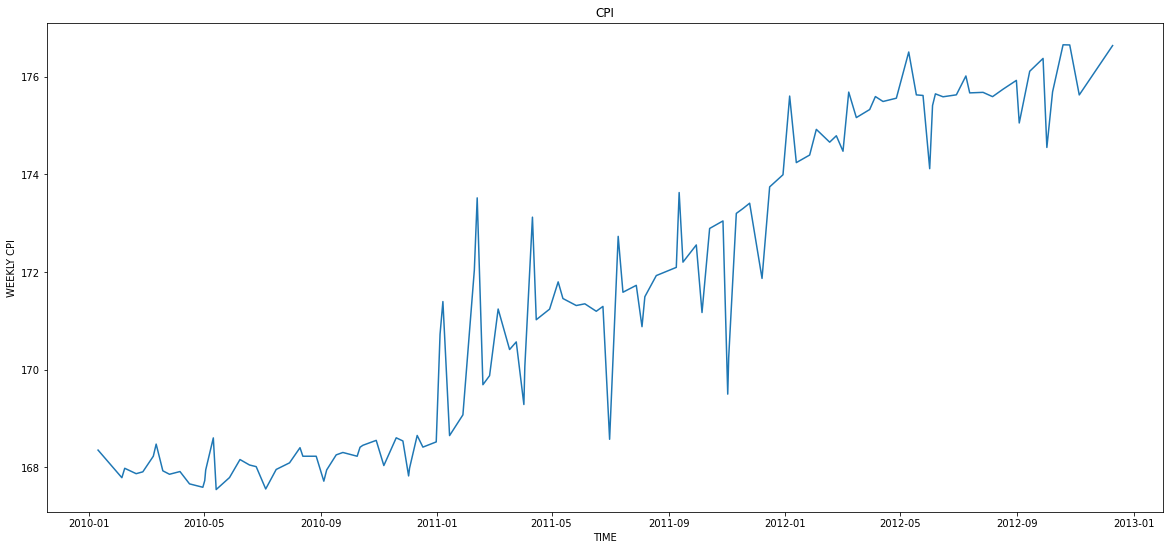

In [46]:
plt.subplots(figsize = (20,9))

plt.plot(data.Date ,data['CPI'])
plt.xlabel('TIME')
plt.ylabel('WEEKLY CPI')
plt.title('CPI')


Text(0.5, 1.0, 'UEMPLOYMENT')

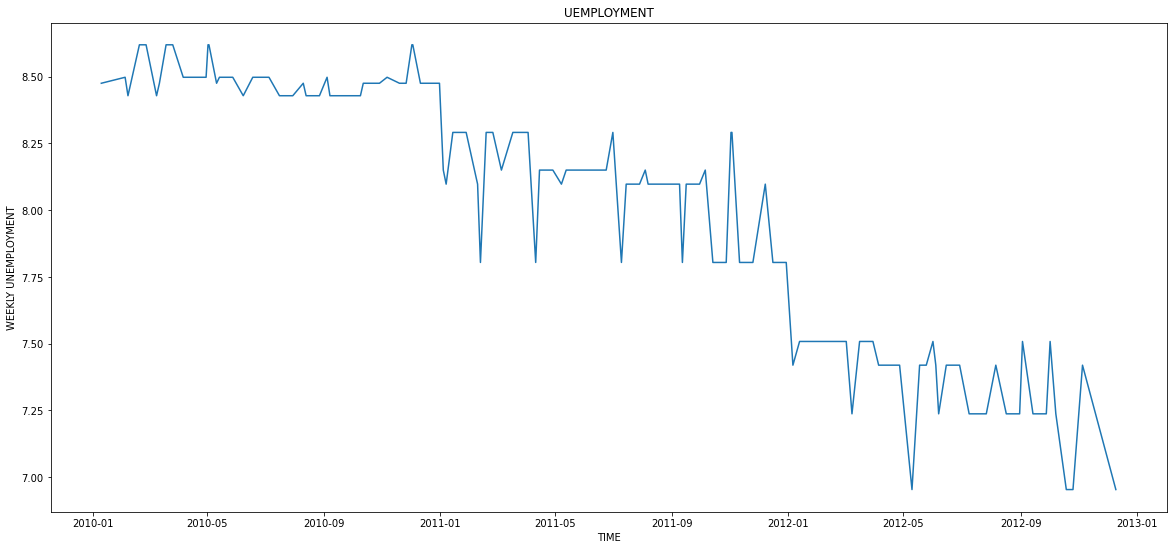

In [47]:
plt.subplots(figsize = (20,9))

plt.plot(data.Date ,data['Unemployment'])
plt.xlabel('TIME')
plt.ylabel('WEEKLY UNEMPLOYMENT')
plt.title('UEMPLOYMENT')

## The Markdown Effect

A markdown is a reduction of the original price of goods to increase sales. Therefore, it will have an effect on the weekly sales.

In [48]:
markdown = features.copy()
markdown.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [49]:
markdown.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [50]:
len(markdown)

8190

dropping the missing values of markdown, would be dropping a huge part of the dataset hence the missing vlaues must be imput. Since a huge part of it is missing,an imputer would be used instead of using the mean or median. 

Before imputting, let's drop the missing values to see the effect of the markdowns.

In [51]:
markdown_notnull = markdown.dropna()
print(markdown_notnull.isnull().sum().sum())
print(len(markdown_notnull))
markdown_notnull.head()

0
2069


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,02/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,09/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False


In [52]:
#let's group by stores
markdown_notnull = markdown_notnull.groupby(['Date', 'IsHoliday']).agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"
                                           , 'MarkDown1': 'sum'
                                        , 'MarkDown2': 'sum'
                                        , 'MarkDown3': 'sum'
                                        , 'MarkDown4': 'sum'
                                        , 'MarkDown5': 'sum'}).reset_index()

markdown_notnull.head()

,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,01/02/2013,False,41.532250,3.400825,178.487701,6.955550,543087.85,48350.95,10967.17,802137.85,105233.99
1,01/03/2013,False,37.298438,3.806250,175.725261,6.957750,278032.33,18424.64,374.70,11466.36,83324.87
2,01/06/2012,False,70.912963,3.702852,179.114736,6.870704,214022.25,835.60,3526.92,47244.39,86342.84
3,02/03/2012,False,44.127143,3.718800,172.708878,7.711114,673239.89,64888.29,1188.32,462918.77,134189.74
4,02/11/2012,False,52.902432,3.672649,176.811296,6.924270,372136.95,292371.19,1546.30,167250.84,124023.90


In [53]:
markdown_notnull['MarkDown'] = markdown_notnull['MarkDown1'] + markdown_notnull['MarkDown2'] + \
markdown_notnull['MarkDown3'] + markdown_notnull['MarkDown4'] + markdown_notnull['MarkDown5']

markdown_notnull.head()

,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,MarkDown
0,01/02/2013,False,41.532250,3.400825,178.487701,6.955550,543087.85,48350.95,10967.17,802137.85,105233.99,1509777.81
1,01/03/2013,False,37.298438,3.806250,175.725261,6.957750,278032.33,18424.64,374.70,11466.36,83324.87,391622.90
2,01/06/2012,False,70.912963,3.702852,179.114736,6.870704,214022.25,835.60,3526.92,47244.39,86342.84,351972.00
3,02/03/2012,False,44.127143,3.718800,172.708878,7.711114,673239.89,64888.29,1188.32,462918.77,134189.74,1336425.01
4,02/11/2012,False,52.902432,3.672649,176.811296,6.924270,372136.95,292371.19,1546.30,167250.84,124023.90,957329.18


In [54]:
markdown_notnull = markdown_notnull.drop(['MarkDown1', 'MarkDown2', 'MarkDown3',
                                         'MarkDown4', 'MarkDown5'], axis =1)

Text(0, 0.5, 'MARKDOWN')

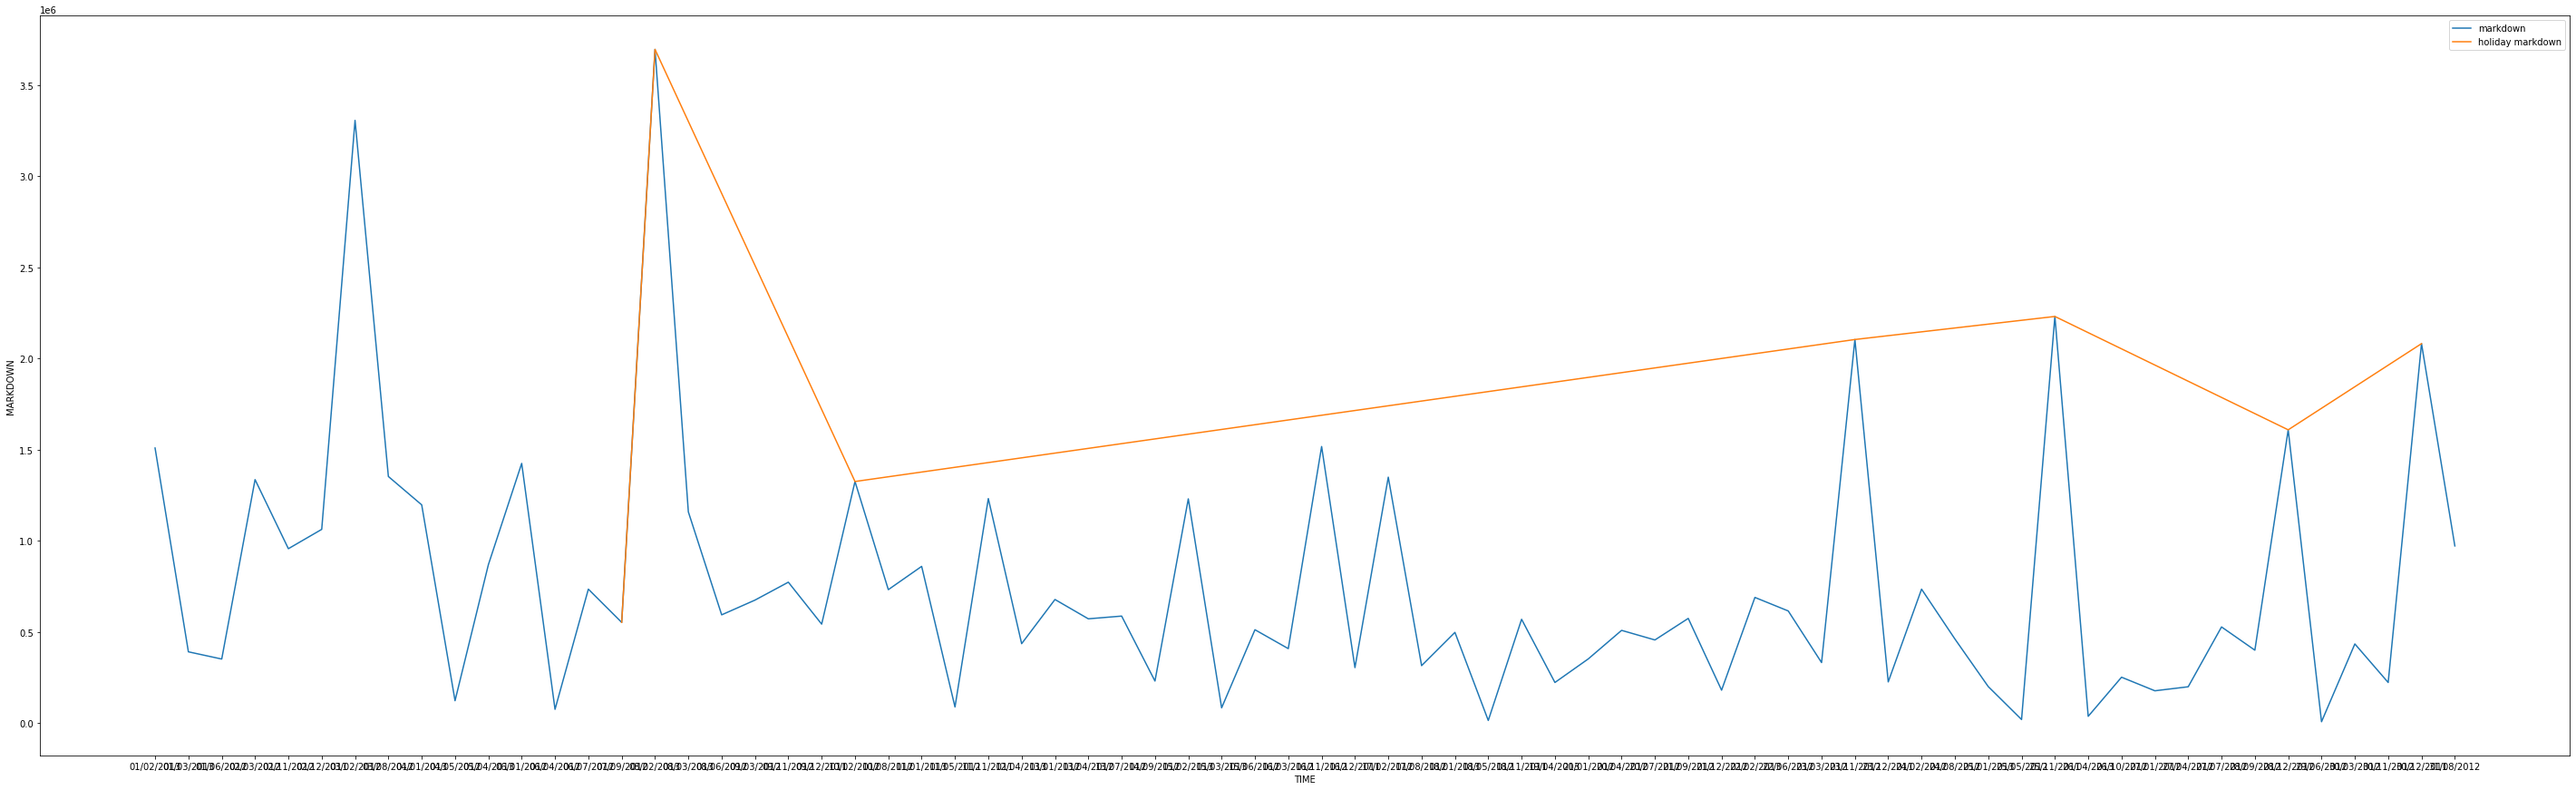

In [55]:
plt.subplots(figsize = (50,15))


markdown_notnull = markdown_notnull.sort_values(by = 'Date')



plt.plot(markdown_notnull.Date ,markdown_notnull['MarkDown'], label = 'markdown')






holiday_markdown_data = markdown_notnull[markdown_notnull.IsHoliday==True]

plt.plot(holiday_markdown_data.Date ,holiday_markdown_data['MarkDown'], label = 'holiday markdown')

plt.legend(loc = 'best')
plt.xlabel('TIME')
plt.ylabel('MARKDOWN')

#### Dealing with missing values

In [56]:
markdown.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [57]:
#Using mean to impute fro the missinf CPI and UnEmployment values
markdown['CPI'].fillna((markdown['CPI'].mean()), inplace=True)
markdown['Unemployment'].fillna((markdown['Unemployment'].mean()), inplace=True)

In [58]:
itt = IterativeImputer()
df = itt.fit_transform(features[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]) 
markdown.MarkDown1 = df[:,0]
markdown.MarkDown2 = df[:,1]
markdown.MarkDown3 = df[:,2]
markdown.MarkDown4 = df[:,3]
markdown.MarkDown5 = df[:,4]

In [59]:
markdown.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [60]:
mk = markdown.copy()
mk.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.350143,8.106,False


In [61]:
mk.Date = pd.to_datetime(mk.Date)
mk.Date = pd.to_datetime(mk.Date)
mk['Year'] = mk.Date.dt.year
mk_year = mk.groupby('Year')[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].sum().reset_index()

cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for i in cols:
    mk_year[i] = (mk_year[i] /10000).round()
mk_year.head()

,Year,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,2010,1519.0,733.0,397.0,578.0,893.0
1,2011,1549.0,916.0,635.0,570.0,1039.0
2,2012,1651.0,736.0,409.0,611.0,1034.0
3,2013,1041.0,394.0,62.0,432.0,419.0


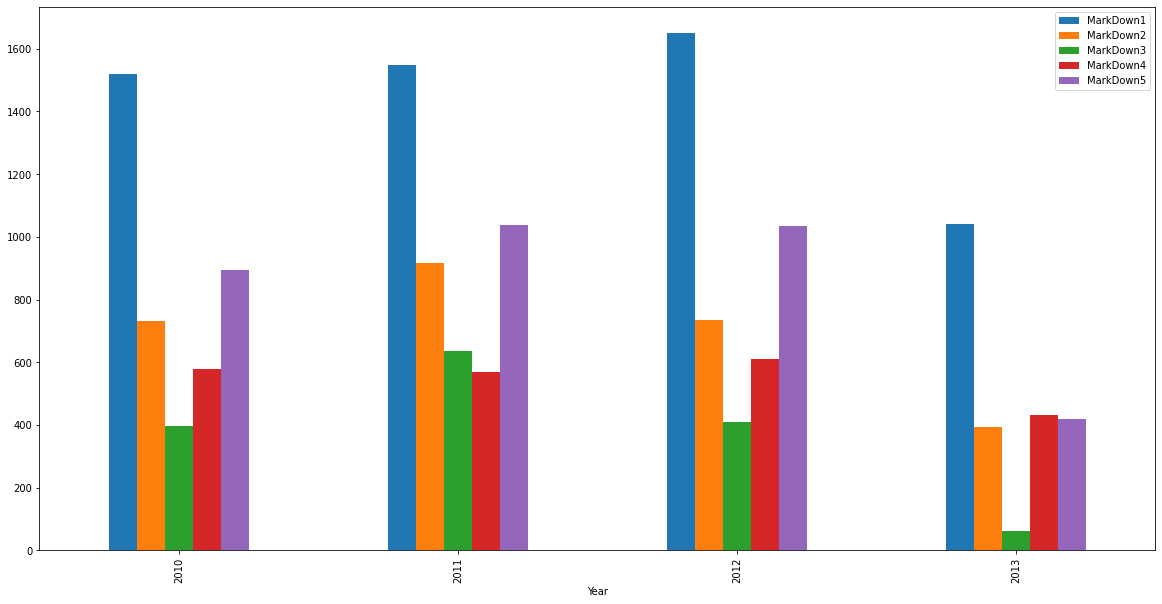

In [62]:
mk_year.plot(kind = 'bar', figsize = (20,10), x = 'Year')

In [63]:
mk_store = pd.merge(mk, stores, how='left', on = ['Store'])
mk_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Type,Size
0,1,2010-05-02,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False,2010,A,151315
1,1,2010-12-02,38.51,2.548,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.242170,8.106,True,2010,A,151315
2,1,2010-02-19,39.93,2.514,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.289143,8.106,False,2010,A,151315
3,1,2010-02-26,46.63,2.561,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.319643,8.106,False,2010,A,151315
4,1,2010-05-03,46.50,2.625,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.350143,8.106,False,2010,A,151315


In [64]:
mk_store.Date = pd.to_datetime(mk_store.Date)
mk_store.Date = pd.to_datetime(mk_store.Date)
mk_store['Year'] = mk_store.Date.dt.year
mk_store_year = mk_store.groupby(['Type'])[["MarkDown1","MarkDown2","MarkDown3",
                                            "MarkDown4","MarkDown5"]].sum().reset_index()

cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for i in cols:
    mk_store_year[i] = (mk_store_year[i] /10000).round()
mk_store_year.head()

,Type,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,A,3162.0,1452.0,792.0,1239.0,1953.0
1,B,2176.0,1013.0,575.0,846.0,1134.0
2,C,422.0,314.0,136.0,106.0,298.0


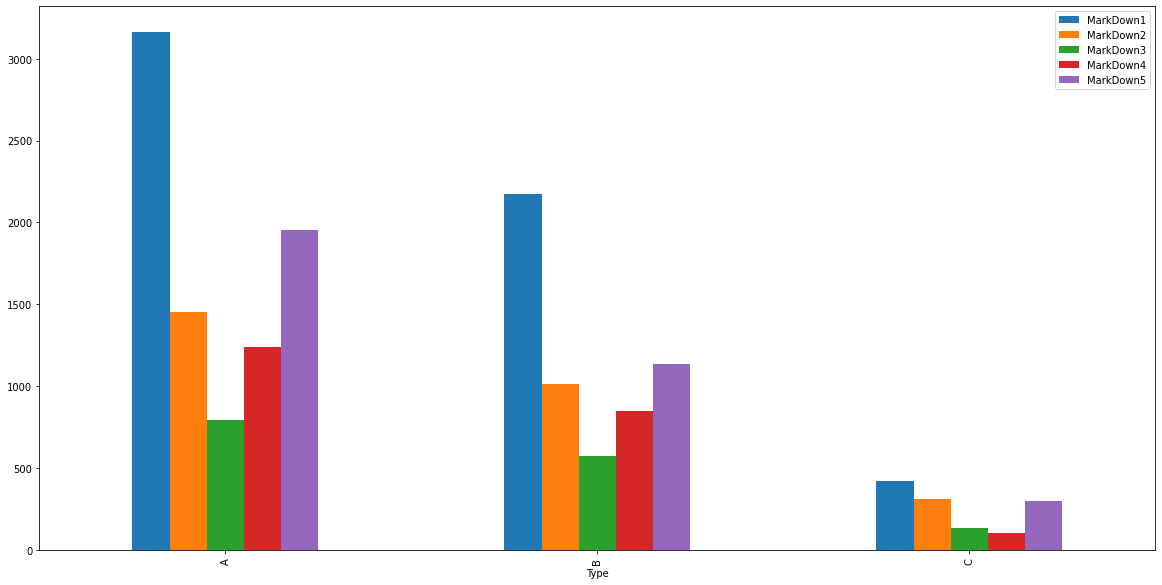

In [65]:
mk_store_year.plot(kind = 'bar', figsize = (20,10), x = 'Type')

## Prediction of the department-wide sales for each store for the following year

from the above, it can be seen the different types of stores has different weekly sales hence merging the sales data with the stores data.

In [66]:
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [67]:
data = pd.merge(markdown,sales ,  how='left', on=["Date","Store", 'IsHoliday'])
data = pd.merge(data,stores[["Store","Type","Size"]] ,  how='left', on=["Store"])

In [68]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False,1.0,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False,2.0,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False,3.0,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False,4.0,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False,5.0,32229.38,A,151315


In [69]:
data.Date = pd.to_datetime(data.Date)
data.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False,1.0,24924.50,A,151315
1,1,2010-05-02,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,False,2.0,50605.27,A,151315


Extracting the year, month and data and dropping the date column

In [70]:
data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI                0
Unemployment       0
IsHoliday          0
Dept            1755
Weekly_Sales    1755
Type               0
Size               0
dtype: int64

In [71]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data["WeekofYear"] = data.Date.dt.weekofyear

In [72]:
data = data.drop(['Date'], axis = 1)

In [73]:
len(pd.unique(data.Dept))

82

Store          -0.085195
Temperature    -0.002312
Fuel_Price     -0.000120
MarkDown1       0.052371
MarkDown2       0.013260
MarkDown3       0.034179
MarkDown4       0.040706
MarkDown5       0.055712
CPI            -0.020921
Unemployment   -0.025864
IsHoliday       0.012774
Dept            0.148032
Weekly_Sales    1.000000
Size            0.243828
Year           -0.010111
Month           0.024944
Day            -0.005135
WeekofYear      0.024395
Name: Weekly_Sales, dtype: float64


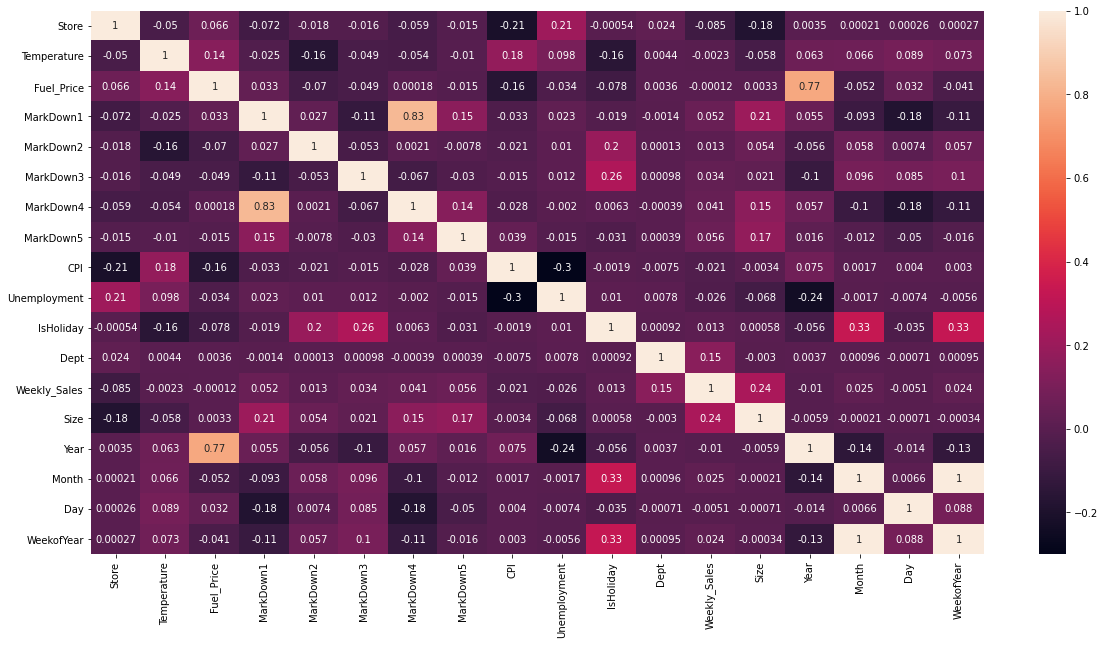

In [74]:
fig, ax = plt.subplots(figsize = (20,10))

correlation = data.corr()
corr = correlation.Weekly_Sales
print(corr)
sns.heatmap(correlation,annot=True)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423325 entries, 0 to 423324
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Temperature   423325 non-null  float64
 2   Fuel_Price    423325 non-null  float64
 3   MarkDown1     423325 non-null  float64
 4   MarkDown2     423325 non-null  float64
 5   MarkDown3     423325 non-null  float64
 6   MarkDown4     423325 non-null  float64
 7   MarkDown5     423325 non-null  float64
 8   CPI           423325 non-null  float64
 9   Unemployment  423325 non-null  float64
 10  IsHoliday     423325 non-null  bool   
 11  Dept          421570 non-null  float64
 12  Weekly_Sales  421570 non-null  float64
 13  Type          423325 non-null  object 
 14  Size          423325 non-null  int64  
 15  Year          423325 non-null  int64  
 16  Month         423325 non-null  int64  
 17  Day           423325 non-null  int64  
 18  Week

## Changing Categorical Data

Using Label Encoding to change type into quantitative data type

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
cols = ['IsHoliday', 'Type']
le = LabelEncoder()
for i in cols:
    data[i] = le.fit_transform(list(data[i]))

In [78]:
data.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Month,Day,WeekofYear
0,1,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,0,1.0,24924.50,0,151315,2010,5,2,17
1,1,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,0,2.0,50605.27,0,151315,2010,5,2,17
2,1,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,0,3.0,13740.12,0,151315,2010,5,2,17
3,1,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,0,4.0,39954.04,0,151315,2010,5,2,17
4,1,42.31,2.572,7031.852089,3391.983532,1835.828065,2675.211153,4132.216422,211.096358,8.106,0,5.0,32229.38,0,151315,2010,5,2,17


In [79]:
data['Dept'].fillna((data['Dept'].median()), inplace=True)

In [80]:
data = pd.get_dummies(data)

Convert Sales and Markdowns in to thousands

In [81]:
cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']

for i in cols:
    data[i] = (data[i] /1000).round()
    
    
data['CPI'] = data['CPI']/100
data.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,Year,Month,Day,WeekofYear
0,1,42.31,2.572,7.0,3.0,2.0,3.0,4.0,2.110964,8.106,0,1.0,25.0,0,151315,2010,5,2,17
1,1,42.31,2.572,7.0,3.0,2.0,3.0,4.0,2.110964,8.106,0,2.0,51.0,0,151315,2010,5,2,17
2,1,42.31,2.572,7.0,3.0,2.0,3.0,4.0,2.110964,8.106,0,3.0,14.0,0,151315,2010,5,2,17
3,1,42.31,2.572,7.0,3.0,2.0,3.0,4.0,2.110964,8.106,0,4.0,40.0,0,151315,2010,5,2,17
4,1,42.31,2.572,7.0,3.0,2.0,3.0,4.0,2.110964,8.106,0,5.0,32.0,0,151315,2010,5,2,17


Predicting the weekly sales hence the missing values will be in the test data and the none missing values used to train the data

In [82]:
train = data[data.Weekly_Sales.notnull()]
test = data[data.Weekly_Sales.isnull()]

for validation purposes, splitting the train datasets 

In [86]:
X = train.drop('Weekly_Sales', axis=1)
y = train['Weekly_Sales']

X_test = test.drop('Weekly_Sales', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

The target variable, weekly sales is a continuous variable hence a linear regression(supervised learning). In this experimenting with the various models and building a stacking method to predict the sales with the minimum rmse error.

## Dealing with Outliers 

This is to help prevent overfitting of the model. From the above boxplot, the data does have outliers so we can proceed to building the model.

## The Model

Importing model libraries

In [87]:
from math import sqrt
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import xgboost as xgb
#import lightgbm as lgb
from sklearn.ensemble import StackingRegressor

from sklearn.metrics import r2_score

import warnings
#ignoring warnings
warnings.filterwarnings('ignore')

In [88]:
def rmse_md(estimator, x, y):
    rmse = np.sqrt(-cross_val_score(estimator, x, y, cv= 15, scoring="neg_mean_squared_error")).mean()
    return rmse  #Root mean square error

In [89]:
Regressors = [
    LinearRegression(),
    ElasticNet(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    Lasso(alpha =16, random_state=100),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(silent=True),
    #lgb.LGBMRegressor()
    
    ]

name = []
score = []
rmse = []


for Regressor in Regressors:
    Regressor.fit(X_train, y_train)   
    name.append(type(Regressor).__name__)
    score.append(Regressor.score(X_val, y_val))
    rmse.append(rmse_md(Regressor, X_val, y_val))

In [90]:
df_score = pd.DataFrame(list(zip(name,rmse, score)),columns=['name','rmse','score'])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

,rmse,score
name,,
RidgeCV,21.662249,-2.335691
Lasso,21.683918,0.083547
ElasticNet,21.640306,0.087459
LinearRegression,21.615225,0.089613
XGBRegressor,11.420564,0.748888
GradientBoostingRegressor,11.414863,0.749917
DecisionTreeRegressor,6.837846,0.948792
RandomForestRegressor,5.075624,0.970205


In [91]:
estimators = [('dt',DecisionTreeRegressor()), 
             ('rft',RandomForestRegressor()), ('gb',GradientBoostingRegressor()), 
             ('xgb',xgb.XGBRegressor(silent=True))]

In [92]:
name = []
score = []
rmse = []

Regressor = StackingRegressor(estimators=estimators)
Regressor.fit(X_train, y_train)   
name.append(type(Regressor).__name__)
score.append(Regressor.score(X_val, y_val))
rmse.append(rmse_md(Regressor, X_val, y_val))

stacking_score = pd.DataFrame(list(zip(name,rmse, score)),columns=['name','rmse','score'])
stacking_score.set_index('name',inplace=True)
stacking_score.sort_values(by=['score'],inplace=True)
stacking_score

,rmse,score
name,,
StackingRegressor,5.065145,0.970043


## Prediciton of the Test Data

Running the prediction on the val dataset

In [93]:
predict =  Regressor.predict(X_val)
predict = pd.DataFrame(predict)

In [94]:
print('The R_Squared on the val dataset is ', r2_score(y_val, predict))

The R_Squared on the val dataset is  0.97004321425638


Now running the prediction on the test dataset

In [133]:
prediction =  Regressor.predict(X_test)
prediction = pd.DataFrame(prediction)
prediction[0] = (prediction[0] * 1000)
prediction.rename(columns={0: 'Weekly Sales'})

,Weekly Sales
0,2892.214691
1,2682.406945
2,2551.080988
3,2350.725385
4,2232.410089
...,...
1750,1774.872822
1751,1701.251870
1752,1662.049612
1753,1783.937490
